# Project: Star Wars Survey Data Exploration

In this project we will explore the responses of 1186 American [Star Wars](https://en.wikipedia.org/wiki/Star_Wars) fans. The data was collected by [FiveThirtyEight](https://fivethirtyeight.com/) team using the online tool [SurveyMonkey](https://www.surveymonkey.com/mp/audience/). The data set is downloadable from [FiveThirtyEight GitHub repository](https://github.com/fivethirtyeight/data/tree/master/star-wars-survey). It has several columns, including:

* **`RespondentID`** : An anonymized ID for the respondent (person taking the survey)
* **`Gender`** : The respondent's gender
* **`Age`** : The respondent's age
* **`Household Income`** : The respondent's income
* **`Education`** : The respondent's education level
* **`Location (Census Region)`** : The respondent's location
* **`Have you seen any of the 6 films in the Star Wars franchise?`** : Has a Yes or No response
* **`Do you consider yourself to be a fan of the Star Wars film franchise?`** : Has a Yes or No response

## Importing Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Importing the dataset

In [2]:
# We need to specify the "ISO-8859-1" encoding because the data set has some characters that aren't in Python's default "utf-8" encoding.
star_wars = pd.read_csv("star_wars.csv", encoding="ISO-8859-1")
star_wars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1187 entries, 0 to 1186
Data columns (total 38 columns):
RespondentID                                                                                                                                     1186 non-null float64
Have you seen any of the 6 films in the Star Wars franchise?                                                                                     1187 non-null object
Do you consider yourself to be a fan of the Star Wars film franchise?                                                                            837 non-null object
Which of the following Star Wars films have you seen? Please select all that apply.                                                              674 non-null object
Unnamed: 4                                                                                                                                       572 non-null object
Unnamed: 5                                                       

In [3]:
star_wars.head(10)

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response
1,3.292880e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,3,...,Very favorably,I don't understand this question,Yes,No,No,Male,18-29,NaN,High school degree,South Atlantic
2,3.292880e+09,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Yes,Male,18-29,"$0 - $24,999",Bachelor degree,West South Central
3,3.292765e+09,Yes,No,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,NaN,NaN,NaN,1,...,Unfamiliar (N/A),I don't understand this question,No,NaN,No,Male,18-29,"$0 - $24,999",High school degree,West North Central
4,3.292763e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Very favorably,I don't understand this question,No,NaN,Yes,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
5,3.292731e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,5,...,Somewhat favorably,Greedo,Yes,No,No,Male,18-29,"$100,000 - $149,999",Some college or Associate degree,West North Central
6,3.292719e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,1,...,Very favorably,Han,Yes,No,Yes,Male,18-29,"$25,000 - $49,999",Bachelor degree,Middle Atlantic
7,3.292685e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,6,...,Very favorably,Han,Yes,No,No,Male,18-29,NaN,High school degree,East North Central
8,3.292664e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,4,...,Very favorably,Han,No,NaN,Yes,Male,18-29,NaN,High school degree,South Atlantic
9,3.292654e+09,Yes,Yes,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Epi

## Data Cleaning

In [4]:
# inspecting the names of columns
star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'Which of the following Star Wars films have you seen? Please select all that apply.',
       'Unnamed: 4', 'Unnamed: 5', 'Unnamed: 6', 'Unnamed: 7', 'Unnamed: 8',
       'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.',
       'Unnamed: 10', 'Unnamed: 11', 'Unnamed: 12', 'Unnamed: 13',
       'Unnamed: 14',
       'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27',
       'Unnamed: 28', 'Which character shot first?',
       'Are you familiar with the Expan

In [5]:
# inspecting unique values in 'Age'
star_wars['Age'].value_counts(dropna=False)

45-60       291
> 60        269
30-44       268
18-29       218
NaN         140
Response      1
Name: Age, dtype: int64

In [6]:
# inspecting unique values in 'Gender'
star_wars['Gender'].value_counts(dropna=False)

Female      549
Male        497
NaN         140
Response      1
Name: Gender, dtype: int64

In [7]:
# inspecting unique values in 'Education'
star_wars['Education'].value_counts(dropna=False)

Some college or Associate degree    328
Bachelor degree                     321
Graduate degree                     275
NaN                                 150
High school degree                  105
Less than high school degree          7
Response                              1
Name: Education, dtype: int64

In [8]:
# inspecting unique values in 'Household Income'
star_wars['Household Income'].value_counts(dropna=False)

NaN                    328
$50,000 - $99,999      298
$25,000 - $49,999      186
$100,000 - $149,999    141
$0 - $24,999           138
$150,000+               95
Response                 1
Name: Household Income, dtype: int64

In [9]:
# inspecting unique values in 'Location (Census Region)'
star_wars['Location (Census Region)'].value_counts(dropna=False)

East North Central    181
Pacific               175
South Atlantic        170
NaN                   143
Middle Atlantic       122
West South Central    110
West North Central     93
Mountain               79
New England            75
East South Central     38
Response                1
Name: Location (Census Region), dtype: int64

There is a common value between all the columns we have seen above which is `'Response'`, let's check this out deeply.

#### Investigating the row that contains 'Response'

In [10]:
# inspecting the row that contains 'Response' 
star_wars.loc[star_wars['Age']=='Response',:]

,RespondentID,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Which of the following Star Wars films have you seen? Please select all that apply.,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.,...,Unnamed: 28,Which character shot first?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦,Do you consider yourself to be a fan of the Star Trek franchise?,Gender,Age,Household Income,Education,Location (Census Region)
0,NaN,Response,Response,Star Wars: Episode I The Phantom Menace,Star Wars: Episode II Attack of the Clones,Star Wars: Episode III Revenge of the Sith,Star Wars: Episode IV A New Hope,Star Wars: Episode V The Empire Strikes Back,Star Wars: Episode VI Return of the Jedi,Star Wars: Episode I The Phantom Menace,...,Yoda,Response,Response,Response,Response,Response,Response,Response,Response,Response


The row that contains `'Response'` seems to be the header of the boxes to check in by the respondent in the survey, this row could have been created when the data was converted to columnar format. 

We see in the DataFrame above that the column `'Unnamed: 28'` contains the value `'Yoda'` which is the name of a character in Star Wars movies, let's check this out deeply.

#### Investigating columns from 'Unamed: 16' to 'Unamed: 28'.

In [11]:
# inspecting the row that contains 'Response' for columns 'Unamed: 16' to 'Unamed: 28'
star_wars.loc[star_wars['Age']=='Response','Unnamed: 16' : 'Unnamed: 28']

,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28
0,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda


The values above are the names of different characters in the Star Wars movies, it seems that they are related to the column `'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'` let's investigate that column.

In [12]:
# inspecting unique values in 'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'
star_wars['Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'].value_counts(dropna=False)

Very favorably                                 610
NaN                                            357
Somewhat favorably                             151
Neither favorably nor unfavorably (neutral)     44
Unfamiliar (N/A)                                15
Somewhat unfavorably                             8
Very unfavorably                                 1
Han Solo                                         1
Name: Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her., dtype: int64

The column  `'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'` contains also a name of Star Wars character wich is `'Han Solo'`.

In summary, columns from **'Unamed: 16'** to **'Unamed: 28'** contain data on the respondents' point of view towards Star Wars characters. Each of the following columns can contain the value `Very favorably`, `Somewhat favorably`, `Unfamiliar (N/A)`, `Somewhat unfavorably`, `Very unfavorably`, or `NaN`:

* **'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'** - How much the respondent liked the character 'Han Solo' 
* **'Unnamed: 16'** - How much the respondent liked the character **'Luke Skywalker'** 
* **'Unnamed: 17'** - How much the respondent liked the character **'Princess Leia Organa'** 
* **'Unnamed: 18'** - How much the respondent liked the character **'Anakin Skywalker'** 
* **'Unnamed: 19'** - How much the respondent liked the character **'Obi Wan Kenobi'** 
* **'Unnamed: 20'** - How much the respondent liked the character **'Emperor Palpatine'** 
* **'Unnamed: 21'** - How much the respondent liked the character **'Darth Vader'** 
* **'Unnamed: 22'** - How much the respondent liked the character **'Lando Calrissian'** 
* **'Unnamed: 23'** - How much the respondent liked the character **'Boba Fett'** 
* **'Unnamed: 24'** - How much the respondent liked the character **'C-3P0'**  
* **'Unnamed: 25'** - How much the respondent liked the character **'R2 D2'** 
* **'Unnamed: 26'** - How much the respondent liked the character **'Jar Jar Binks'** 
* **'Unnamed: 27'** - How much the respondent liked the character **'Padme Amidala'** 
* **'Unnamed: 28'** - How much the respondent liked the character **'Padme Yoda'**                                              

Here we will save the names of the characters in a list for future use.

In [13]:
characters = star_wars.iloc[0, 15:29].values.tolist()
characters

['Han Solo',
 'Luke Skywalker',
 'Princess Leia Organa',
 'Anakin Skywalker',
 'Obi Wan Kenobi',
 'Emperor Palpatine',
 'Darth Vader',
 'Lando Calrissian',
 'Boba Fett',
 'C-3P0',
 'R2 D2',
 'Jar Jar Binks',
 'Padme Amidala',
 'Yoda']

#### Investigating columns from 'Unamed: 4' to 'Unamed: 8'.

In [14]:
# inspecting unique values in 'Unnamed: 4'
star_wars['Unnamed: 4'].value_counts(dropna=False)

NaN                                            615
Star Wars: Episode II  Attack of the Clones    572
Name: Unnamed: 4, dtype: int64

In [15]:
# inspecting unique values in 'Unnamed: 8'
star_wars['Unnamed: 8'].value_counts(dropna=False)

Star Wars: Episode VI Return of the Jedi    739
NaN                                         448
Name: Unnamed: 8, dtype: int64

The columns **'Unamed: 4'** to **'Unamed: 8'** represent a single checkbox question that are related to the question, **'Which of the following Star Wars films have you seen? Please select all that apply.'**

In [16]:
# inspecting unique values in 'Which of the following Star Wars films have you seen? Please select all that apply.'
star_wars['Which of the following Star Wars films have you seen? Please select all that apply.'].value_counts(dropna=False)

Star Wars: Episode I  The Phantom Menace    674
NaN                                         513
Name: Which of the following Star Wars films have you seen? Please select all that apply., dtype: int64

In summary, the following columns are related to the question "`Which of the following Star Wars films have you seen?`" :

* **Which of the following Star Wars films have you seen? Please select all that apply.** - Whether or not the respondent saw Star Wars: Episode I The Phantom Menace.
* **Unnamed: 4** - Whether or not the respondent saw Star Wars: Episode II Attack of the Clones.
* **Unnamed: 5** - Whether or not the respondent saw Star Wars: Episode III Revenge of the Sith.
* **Unnamed: 6** - Whether or not the respondent saw Star Wars: Episode IV A New Hope.
* **Unnamed: 7** - Whether or not the respondent saw Star Wars: Episode V The Empire Strikes Back.
* **Unnamed: 8** - Whether or not the respondent saw Star Wars: Episode VI Return of the Jedi.

#### Investigating columns from 'Unamed: 10' to 'Unamed: 14'.

In [17]:
# inspecting unique values in 'Unnamed: 10'
star_wars['Unnamed: 10'].value_counts(dropna=False)

NaN                                            350
5                                              300
4                                              183
2                                              116
3                                              103
6                                              102
1                                               32
Star Wars: Episode II  Attack of the Clones      1
Name: Unnamed: 10, dtype: int64

In [18]:
# inspecting unique values in 'Unnamed: 14'
star_wars['Unnamed: 14'].value_counts(dropna=False)

NaN                                         350
2                                           232
3                                           220
1                                           146
6                                           145
4                                            57
5                                            36
Star Wars: Episode VI Return of the Jedi      1
Name: Unnamed: 14, dtype: int64

In [19]:
# inspecting unique values in 'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'
star_wars['Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'].value_counts(dropna=False)

NaN                                         351
4                                           237
6                                           168
3                                           130
1                                           129
5                                           100
2                                            71
Star Wars: Episode I  The Phantom Menace      1
Name: Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film., dtype: int64

Columns from **Unamed: 10** to **Unamed: 14** ask the respondent to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Each of the following columns can contain the value 1, 2, 3, 4, 5, 6, or NaN:

* **Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.** - How much the respondent liked Star Wars: Episode I The Phantom Menace
* **Unnamed: 10** - How much the respondent liked Star Wars: Episode II Attack of the Clones
* **Unnamed: 11** - How much the respondent liked Star Wars: Episode III Revenge of the Sith
* **Unnamed: 12** - How much the respondent liked Star Wars: Episode IV A New Hope
* **Unnamed: 13** - How much the respondent liked Star Wars: Episode V The Empire Strikes Back
* **Unnamed: 14** - How much the respondent liked Star Wars: Episode VI Return of the Jedi

### Data quality notes.

* **'RespondentID'** contains NaN values that we need to remove.
* Columns like **'Have you seen any of the 6 films in the Star Wars franchise?'** and **'Do you consider yourself to be a fan of the Star Wars film franchise?'**  are currently string types, because the main values they contain are 'Yes' and 'No'. We can make the data a bit easier to analyze by converting them to a Boolean having only the values True, False, and NaN.
* The names of columns **'Which of the following Star Wars films have you seen? Please select all that apply.'** to **'Unnamed: 8'** need to be more intuitive, the same case with columns from **'Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.'** to **'Unamed: 14'** and columns from **'Please state whether you view the following characters favorably, unfavorably, or are unfamiliar with him/her.'** to **'Unnamed: 28'**.
* Columns **'Which of the following Star Wars films have you seen? Please select all that apply.'** to **'Unnamed: 8'** are object type. We'll need to convert each of these columns to a Boolean 'True' and 'False' values.
* We need to remove the strange Characters from **'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦'**

#### Remove any rows where RespondentID is NaN.

In [20]:
# Remove any rows where RespondentID is NaN
star_wars = star_wars[star_wars['RespondentID'].notnull()]

In [21]:
print('The number of rows is',star_wars.shape[0])

The number of rows is 1186


#### Renaming columns.

In [22]:
# Renaming columns related to the question 'Which of the following Star Wars films have you seen?'
i_saw_it = {"Which of the following Star Wars films have you seen? Please select all that apply.": "I saw Star Wars: Episode I  The Phantom Menace",
        "Unnamed: 4": "I saw Star Wars: Episode II  Attack of the Clones",
        "Unnamed: 5": "I saw Star Wars: Episode III  Revenge of the Sith",
        "Unnamed: 6": "I saw Star Wars: Episode IV  A New Hope",
        "Unnamed: 7": "I saw Star Wars: Episode V The Empire Strikes Back",
        "Unnamed: 8": "I saw Star Wars: Episode VI Return of the Jedi"}
star_wars.rename(columns=i_saw_it,inplace=True)

# Renaming columns related to the question 'Please rank the Star Wars films in order of preference
# with 1 being your favorite film in the franchise and 6 being your least favorite film.'    
ranking = {"Please rank the Star Wars films in order of preference with 1 being your favorite film in the franchise and 6 being your least favorite film.": "Star Wars: Episode I  The Phantom Menace rank",
        "Unnamed: 10": "Star Wars: Episode II  Attack of the Clones rank",
        "Unnamed: 11": "Star Wars: Episode III  Revenge of the Sith rank",
        "Unnamed: 12": "Star Wars: Episode IV  A New Hope rank",
        "Unnamed: 13": "Star Wars: Episode V The Empire Strikes Back rank",
        "Unnamed: 14": "Star Wars: Episode VI Return of the Jedi rank"}
star_wars.rename(columns=ranking,inplace=True)

# Renaming columns related to the question 'Please state whether you view the following characters 
#favorably, unfavorably, or are unfamiliar with him/her.
star_wars_characters = dict(zip(star_wars.columns[15:29],characters))
star_wars.rename(columns=star_wars_characters,inplace=True)

# remove strange characters from 'Do you consider yourself to be a fan of the Expanded Universe?ÂÃ¦
star_wars.columns = star_wars.columns.str.replace('ÂÃ¦','')

star_wars.columns

Index(['RespondentID',
       'Have you seen any of the 6 films in the Star Wars franchise?',
       'Do you consider yourself to be a fan of the Star Wars film franchise?',
       'I saw Star Wars: Episode I  The Phantom Menace',
       'I saw Star Wars: Episode II  Attack of the Clones',
       'I saw Star Wars: Episode III  Revenge of the Sith',
       'I saw Star Wars: Episode IV  A New Hope',
       'I saw Star Wars: Episode V The Empire Strikes Back',
       'I saw Star Wars: Episode VI Return of the Jedi',
       'Star Wars: Episode I  The Phantom Menace rank',
       'Star Wars: Episode II  Attack of the Clones rank',
       'Star Wars: Episode III  Revenge of the Sith rank',
       'Star Wars: Episode IV  A New Hope rank',
       'Star Wars: Episode V The Empire Strikes Back rank',
       'Star Wars: Episode VI Return of the Jedi rank', 'Han Solo',
       'Luke Skywalker', 'Princess Leia Organa', 'Anakin Skywalker',
       'Obi Wan Kenobi', 'Emperor Palpatine', 'Darth Vader',


#### Converting columns from position 3 to 8 into Boolean type. 
We will convert the columns from position 3 to 8 so that they contain only the values True and False, if the value in a cell is the name of the movie, that means the respondent saw the movie. If the value is NaN, the respondent either didn't answer or didn't see the movie. We'll assume that they didn't see the movie.

In [23]:
# define a function that update the value to True if the value is the name of the movie, False if the value is None.
def update_val(val):
    if val in ["Star Wars: Episode I  The Phantom Menace",
        "Star Wars: Episode II  Attack of the Clones",
        "Star Wars: Episode III  Revenge of the Sith",
        "Star Wars: Episode IV  A New Hope",
        "Star Wars: Episode V The Empire Strikes Back",
        "Star Wars: Episode VI Return of the Jedi"]:
        return True
    else:
        return False

# apply the update_val element-wise on columns from position 3 to 8.    
star_wars[star_wars.columns[3:9]] = star_wars[star_wars.columns[3:9]].applymap(update_val)
star_wars[star_wars.columns[3:9]].head()

,I saw Star Wars: Episode I The Phantom Menace,I saw Star Wars: Episode II Attack of the Clones,I saw Star Wars: Episode III Revenge of the Sith,I saw Star Wars: Episode IV A New Hope,I saw Star Wars: Episode V The Empire Strikes Back,I saw Star Wars: Episode VI Return of the Jedi
1,True,True,True,True,True,True
2,False,False,False,False,False,False
3,True,True,True,False,False,False
4,True,True,True,True,True,True
5,True,True,True,True,True,True


#### Changing 'Yes' and 'No' values into 'True' and 'False'
We will convert each column of the list bellow to a Boolean having only the values True, False, and NaN. 
* ***Have you seen any of the 6 films in the Star Wars franchise?***
* ***Do you consider yourself to be a fan of the Star Wars film franchise?***
* ***Are you familiar with the Expanded Universe?***	
* ***Do you consider yourself to be a fan of the Expanded Universe?***	
* ***Do you consider yourself to be a fan of the Star Trek franchise?***

In [24]:
# define a function that change 'Yes' to 'True' and 'No' to 'False'.
def yes_no(val):
    if val == "Yes":
        return True
    elif val == "No":
        return False

# apply the function yes_no element-wise on columns with position 1,2,30,31 and 32.    
star_wars[star_wars.columns[[1,2,30,31,32]]] = star_wars[star_wars.columns[[1,2,30,31,32]]].applymap(yes_no)
star_wars[star_wars.columns[[1,2,30,31,32]]].head()

,Have you seen any of the 6 films in the Star Wars franchise?,Do you consider yourself to be a fan of the Star Wars film franchise?,Are you familiar with the Expanded Universe?,Do you consider yourself to be a fan of the Expanded Universe?,Do you consider yourself to be a fan of the Star Trek franchise?
1,True,True,True,False,False
2,False,None,None,None,True
3,True,False,False,None,False
4,True,True,False,None,True
5,True,True,True,False,False


## Data Analysis

Recall that the respondent was asked to rank the Star Wars movies in order of least favorite to most favorite. 1 means the film was the most favorite, and 6 means it was the least favorite. Now that we've cleaned up the ranking columns, we can find the highest-ranked movie more quickly. To do this, we will take the mean of each of the ranking columns using the pandas. DataFrame.mean() method on dataframes wich means that the movie with the lowest ranking is the best!

### The most popular Star Wars movie

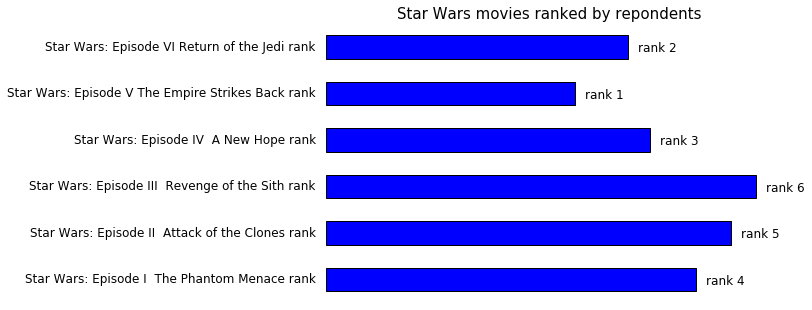

In [25]:
# find the mean of each of the ranking columns
ranking = star_wars[star_wars.columns[9:15]].astype(float).mean(axis=0)
# visualization 
fig , ax = plt.subplots(figsize=[8,5])
ax = star_wars[star_wars.columns[9:15]].astype(float).mean(axis=0).plot.barh(color='blue')
# remove x ticks labels
ax.set_xticks([])
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False)    
# set title
ax.set_title('Star Wars movies ranked by repondents',size=15)
# remove y ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# add padding between axes and labels set y label size
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10,labelsize=12)
# annotation
for p, q in zip(ax.patches, ranking.index.values.tolist()):
    ax.text(p.get_width()+.1,p.get_y()+p.get_height()/2-.1,'rank '+str(ranking.sort_values(ascending=True).index.values.tolist().index(q)+1),size=12)


In general, fans seem to prefer the original trilogy of the cinematic saga of Star Wars which consists of "A New Hope (1977)", "The Empire Strikes Back (1980)" and "Return of the Jedi (1983)". The trilogy was the first epic science fiction space adventure to be told on a large scale that is why it holds a special place in the hearts of Star Wars fans. `"Star Wars: Episode V The Empire Strikes Back"` is considered by the respondents to be the best film in the saga.

### The most seen Star Wars movie

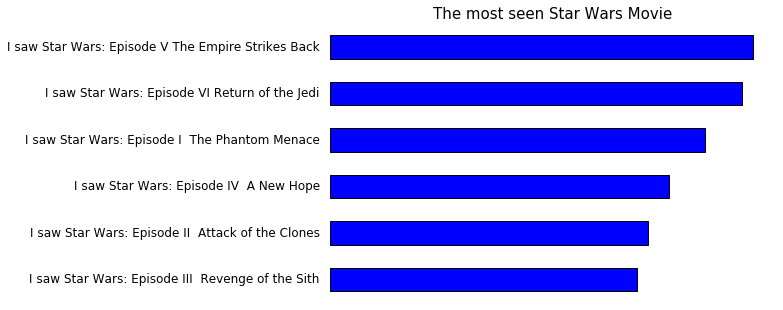

In [26]:
fig,ax = plt.subplots(figsize=[8,5])
ax = star_wars[star_wars.columns[3:9]].sum(axis=0).sort_values().plot.barh(color='blue')
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x ticks labels
ax.set_xticklabels([])
# set title
ax.set_title('The most seen Star Wars Movie',size=15)
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# add padding between axes and labels
ax.xaxis.set_tick_params(pad=5)
ax.yaxis.set_tick_params(pad=10,labelsize=12)

`"Star Wars: Episode V The Empire Strikes Back"` is the most seen Star Wars movie by the respondents. In general the results correlate positively with the ranking, the more the movie is popular, the more it is watched.

### The most popular Star Wars movie by gender

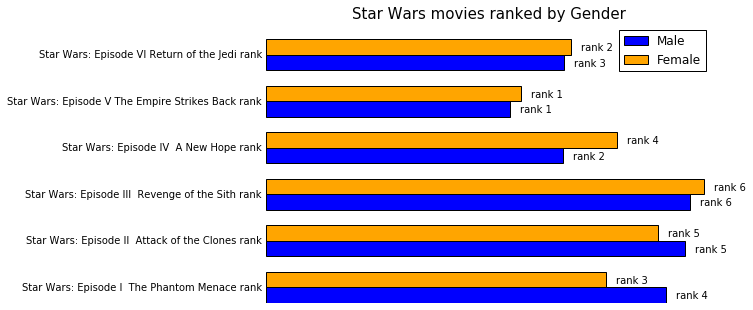

In [27]:
# star wars movies names
sw_movies_rank = star_wars.columns[9:15]
# male's preferences
male_preference = star_wars.loc[star_wars["Gender"] == "Male",sw_movies_rank].astype(float).mean()
# female's preferences
female_preference = star_wars.loc[star_wars["Gender"] == "Female",sw_movies_rank].astype(float).mean()

# visualization :
fig,ax = plt.subplots(figsize=[8,5])

y_index = np.array([0,1.5,3,4.5,6,7.5])
height = .5
# plotting male_preference 
m = ax.barh(y_index ,male_preference,height)
# plotting female_preference 
f= ax.barh(y_index+height ,female_preference,height,color='orange')
# set y axis ticks and labels
ax.set_yticks(y_index+.5)
ax.set_yticklabels(labels=sw_movies_rank.values)
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# remove x ticks labels
ax.set_xticklabels([])
# set title
ax.set_title('Star Wars movies ranked by Gender',size=15)
# legend
ax.legend((m, f), ('Male', 'Female'))
# annotation_male
for p, q in zip(m.patches, male_preference.index.values.tolist()):
    ax.text(p.get_width()+.1,p.get_y()+p.get_height()/2-.13,'rank '+str(male_preference.sort_values(ascending=True).index.values.tolist().index(q)+1),size=10)
# annotation_female
for p, q in zip(f.patches, female_preference.index.values.tolist()):
    ax.text(p.get_width()+.1,p.get_y()+p.get_height()/2-.13,'rank '+str(female_preference.sort_values(ascending=True).index.values.tolist().index(q)+1),size=10)

`"Episode V: The Empire Strikes Back"` is the most popular Star Wars film among female and male fans. Men rated the three original movies at the top of their favorite Star Wars films while only two of the original movies were highly rated by women, they considered `" Episode I: The Phantom Menace 1999"` is more popular than `"Episode IV: A New Hope 1977"`.

### The most seen Star Wars movie by gender

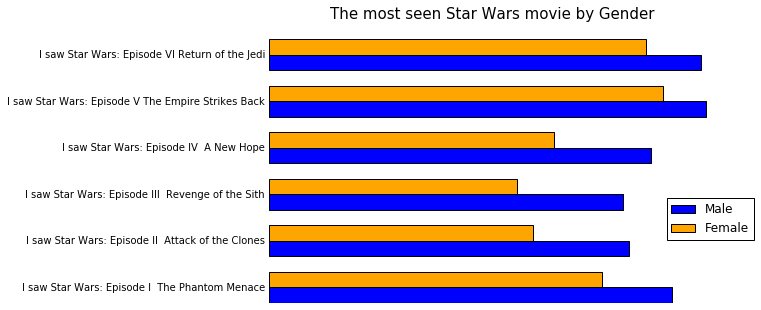

In [28]:
seen = star_wars.columns[3:9]
seen_movie_by_male = star_wars.loc[star_wars["Gender"] == "Male",seen].astype(float).sum()
seen_movie_by_female = star_wars.loc[star_wars["Gender"] == "Female",seen].astype(float).sum()

fig,ax = plt.subplots(figsize=[8,5])

y_index = np.array([0,1.5,3,4.5,6,7.5])
height = .5

m = ax.barh(y_index ,seen_movie_by_male,height)
f= ax.barh(y_index+height ,seen_movie_by_female,height,color='orange')
# set y axis ticks and labels
ax.set_yticks(y_index+.5)
ax.set_yticklabels(labels=seen.values)
# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# remove x ticks labels
ax.set_xticklabels([])
# set title
ax.set_title('The most seen Star Wars movie by Gender',size=15)
# set legend
ax.legend((m, f), ('Male', 'Female'),loc='center right',bbox_to_anchor=(1.1, 0.3))

Star Wars movies are more popular among men than women, `"Episode V The Empire Striked Back"` is the most watched Star Wars movie among both of men and women.

### Location of Star wars fans respondents

We will focus here on respondents who consider themselves to be a fan of Star Wars film franchise.

In [29]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

True     552
NaN      350
False    284
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

We will fill nan values with False values.

In [30]:
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']=star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].fillna(False)
star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'].value_counts(dropna=False)

False    634
True     552
Name: Do you consider yourself to be a fan of the Star Wars film franchise?, dtype: int64

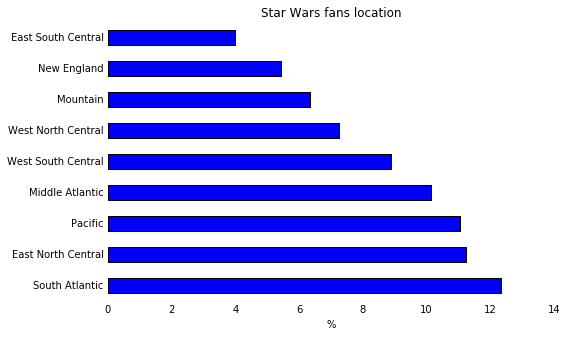

In [31]:
fig,ax = plt.subplots(figsize=[8,5])
ax= (star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True,'Location (Census Region)'].value_counts()*100/552).plot.barh(color='blue')

# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# set x axis label
ax.set_xlabel('%')
# set title
ax.set_title('Star Wars fans location',size=12)

Most of the Star Wars fans who responded to the survey are located in the South Atlantic states, the East North Central, the Pacific and the Middle Atlantic.

### Education level for Star Wars fans

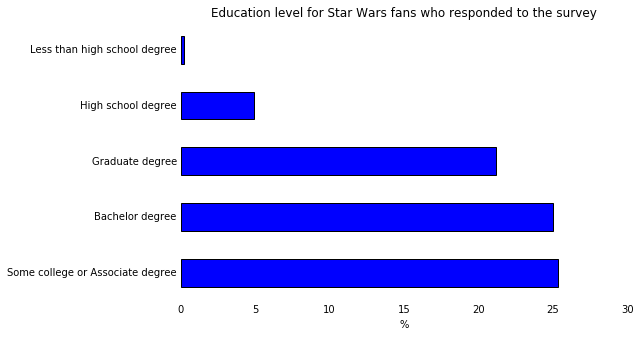

In [32]:
fig,ax = plt.subplots(figsize=[8,5])

ax= (star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True,'Education'].value_counts()*100/552).plot.barh(color='blue')

# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# set x axis label
ax.set_xlabel('%')
# set title
ax.set_title('Education level for Star Wars fans who responded to the survey',size=12)

95% of the Star Wars fans who respond to the survey have more than a High school degree.

### Which character shot first?

**`'Which character shot first?'`** ` {1} this question refers to a controversial change made to a scene in the science fiction action film Star Wars (1977), in which Han Solo (Harrison Ford) is confronted by the bounty hunter Greedo (Paul Blake) in the Mos Eisley cantina. In the original version of the scene, Han shoots Greedo dead. Later versions are edited so that Greedo attempts to fire at Han first. Director George Lucas altered the scene to give Solo more justification for acting in self-defense. Many fans and commentators oppose the change, feeling it weakens Solo's character. The controversy is referenced in the 2018 film Solo: A Star Wars Story.`


{1}: `Wikipedia`.


In [33]:
# inspecting unique values in 'Which character shot first?'.
star_wars['Which character shot first?'].value_counts(dropna=False)

NaN                                 358
Han                                 325
I don't understand this question    306
Greedo                              197
Name: Which character shot first?, dtype: int64

In [34]:
# filling the nan values with 'I don't understand this question'
star_wars['Which character shot first?']=star_wars['Which character shot first?'].fillna("I don't understand this question")
star_wars['Which character shot first?'].value_counts(dropna=False)

I don't understand this question    664
Han                                 325
Greedo                              197
Name: Which character shot first?, dtype: int64

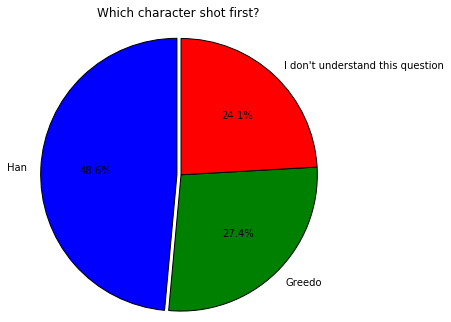

In [35]:
fig,ax = plt.subplots(figsize=[5,5])
ax = star_wars.loc[star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?'] == True,'Which character shot first?']\
.value_counts(dropna=False).plot.pie(autopct='%1.1f%%',explode=[0.03,0,0], startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_ylabel('')
ax.set_title('Which character shot first?').set_position([.5, 1.05])

About half of those who consider themselves Star Wars fans are confident that Han Solo shot first in other hands 24% of respondants who consider themselves Star Wars fans didnt understand the question.

### Science fiction movie enthusiasts
Here we will be interested in the age of sci-fi movies passionates, we will consider any respondent who is both a fan of star wars and star trek as such.

In [36]:
geek=(star_wars['Do you consider yourself to be a fan of the Star Trek franchise?'] == True) & (star_wars['Do you consider yourself to be a fan of the Star Wars film franchise?']==True)

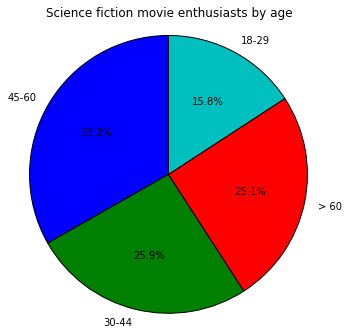

In [37]:
fig,ax = plt.subplots(figsize=[5,5])
ax= (star_wars.loc[geek,'Age'].value_counts()*100/geek.astype(int).sum()).plot.pie(autopct='%1.1f%%',explode=[0,0,0,0], startangle=90)
ax.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax.set_ylabel('')
ax.set_title('Science fiction movie enthusiasts by age').set_position([.5, 1.05])

About 25% of science fiction movie fans are over the age of 60!

### Which character do respondents like the most ?

In [38]:
characters = star_wars[star_wars.columns[15:29]]
characters.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Unfamiliar (N/A),Unfamiliar (N/A),Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Somewhat favorably,Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A),Unfamiliar (N/A)
4,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably,Somewhat favorably,Very favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very favorably,Very favorably,Very favorably,Very favorably
5,Very favorably,Somewhat favorably,Somewhat favorably,Somewhat unfavorably,Very favorably,Very unfavorably,Somewhat favorably,Neither favorably nor unfavorably (neutral),Very favorably,Somewhat favorably,Somewhat favorably,Very unfavorably,Somewhat favorably,Somewhat favorably


We will create a function that converts the respondent's point of view towards a Star Wars character to a score ranging from -2 to 2 we will then apply the sum of the scores for each character, the character with the highest score is the most appreciated by the respondents.

In [39]:
# create a function that converts the respondent's point of view towards a star wars character to a score ranging from -2 to 2.
def update_val(val):
    if val=='Very favorably':
        return 2
    elif val=='Somewhat favorably':
        return 1
    elif val in ['Neither favorably nor unfavorably (neutral)' , 'Unfamiliar (N/A)',np.nan]:
        return 0
    elif val == 'Very unfavorably':
        return -2
    elif val == 'Somewhat unfavorably':
        return -1
# apply the update_val element-wise on columns with position 15 to 28.    
characters = characters.applymap(update_val)

In [40]:
characters.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,2,2,2,2,2,2,2,0,0,2,2,2,2,2
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,1,1,1,0,0,0,0,0,0,0,0,0
4,2,2,2,2,2,1,2,1,-1,2,2,2,2,2
5,2,1,1,-1,2,-2,1,0,2,1,1,-2,1,1


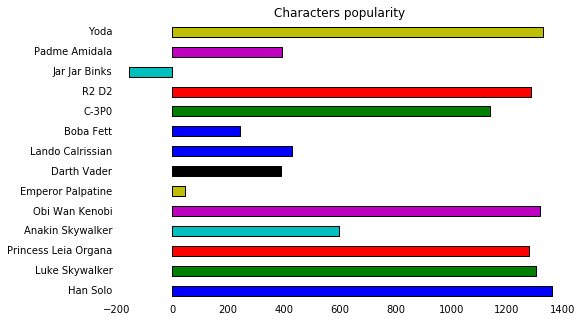

In [41]:
fig,ax = plt.subplots(figsize=[8,5])

ax= characters.sum(axis=0).plot.barh()

# remove spines
for key,spine in ax.spines.items():
    spine.set_visible(False) 
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# set title
ax.set_title('Characters popularity',size=12)

'Yoda' and 'Han Solo' are the respondents' favorite characters, in contrast 'Jar Jar Binks' is the least popular among the characters.

### Which character is the most controversial ?

To find the most controversial character we need to split between the likes and the dislikes of each character to do that we are going to create a function that convert scores into 'like', 'dislike' and 'neutral'.

In [42]:
# create a function that converts scores into likes, dislikes and neutral.
def like_dislike(val):
    if val > 0 :
        return 'like'
    elif val < 0 :
        return 'dislike'
    elif val == 0:
        return 'neutral'
# apply the like_dislike element-wise on columns with position 15 to 29.    
characters = characters.applymap(like_dislike)

In [43]:
characters.head()

,Han Solo,Luke Skywalker,Princess Leia Organa,Anakin Skywalker,Obi Wan Kenobi,Emperor Palpatine,Darth Vader,Lando Calrissian,Boba Fett,C-3P0,R2 D2,Jar Jar Binks,Padme Amidala,Yoda
1,like,like,like,like,like,like,like,neutral,neutral,like,like,like,like,like
2,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
3,like,like,like,like,like,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral,neutral
4,like,like,like,like,like,like,like,like,dislike,like,like,like,like,like
5,like,like,like,dislike,like,dislike,like,neutral,like,like,like,dislike,like,like


In [44]:
# Unpivot the DataFrame characters from wide to long format
melted = characters.melt()
# excluding 'neutral' values
melted = melted[melted['value']!='neutral']
melted.head()

,variable,value
0,Han Solo,like
2,Han Solo,like
3,Han Solo,like
4,Han Solo,like
5,Han Solo,like


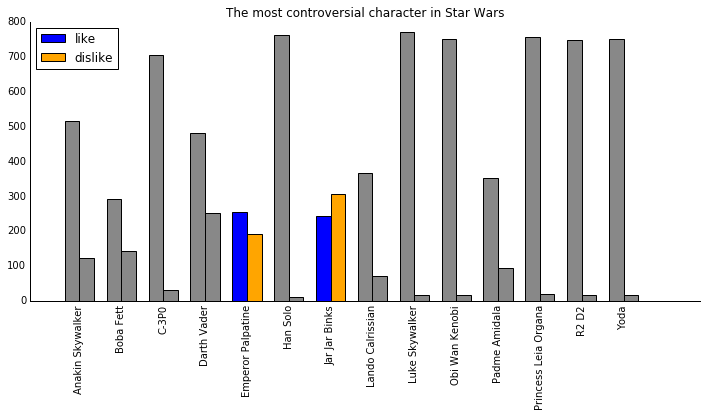

In [45]:
# Visualisation
import matplotlib.pyplot as plt
from matplotlib import colors

fig,ax=plt.subplots(figsize=(12,5))

# keeping only the 'like' value and group by characters
like = melted[melted['value']=='like'].groupby('variable').size()
# keeping only the 'dislike' value and group by characters
dislike = melted[melted['value']=='dislike'].groupby('variable').size()
# set the x axis ticks index
ind = np.arange(1,15) 
# set the width of bars
width = 0.35       

like_bars = ax.bar(ind - width/2, like, width,label='like',color='blue')
dislike_bars = ax.bar(ind + width/2 , dislike, width,label='dislike',color='orange')
# set legend
ax.legend(loc='upper left')
# set x axis ticks labels
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(like.index,rotation=90)
# ax.set_title
ax.set_title('The most controversial character in Star Wars')
# remove spines
for key,spine in ax.spines.items():
    if key in ['top','right']:
        spine.set_visible(False)  
# remove x,y Ticks
ax.yaxis.set_ticks_position('none')
ax.xaxis.set_ticks_position('none')
# ax.tick_params(axis='x', rotation=45)
# make colors in the barplot stand out 
for charac in characters.columns:
    if charac not in ['Jar Jar Binks','Emperor Palpatine']:
        pos_dislike = dislike.index.get_loc(charac)
        pos_like = dislike.index.get_loc(charac)        
        like_bars.patches[pos_like].set_facecolor('#888888')
        dislike_bars.patches[pos_dislike].set_facecolor('#888888')

It is surprising to find that 'Jar Jar Binks' is the most controversial character wich is recognized as one of the most hated characters in Star Wars !

## Conclusion:
In this project we have explored the Star Wars survey that was made by [FiveThirtyEight](https://fivethirtyeight.com/) team. We have found out the following:
* In general, fans seem to prefer the original trilogy of the cinematic saga of Star Wars which consists of A New Hope (1977), The Empire Strikes Back (1980) and Return of the Jedi (1983). 
* "Star Wars: Episode V The Empire Strikes Back" is considered by the respondents to be the best film in the saga hence it makes it the most seen Star Wars movie by the fans.
* Men rated the three original movies at the top of their favorite star wars films while only two of the original movies were highly rated by women, they considered " Episode I: The Phantom Menace 1999" more popular than "Episode IV: A New Hope 1977".
* Most of the Star Wars fans who responded to the survey are located in the South Atlantic states, the East North Central, the Pacific and the Middle Atlantic.
* 95% of the Star Wars fans who respond to the survey have more than a High school degree.
* About half of those who consider themselves Star Wars fans are confident that Han Solo shot first in other hands 24% of respondants who consider themselves a Star Wars fans didnt understand the question.
* About 25% of science fiction movie fans are over the age of 60.
* 'Yoda' and 'Han Solo' are the respondents' favorite characters, in contrast 'Jar Jar Binks' is the least popular among the characters.
* It is surprising to find that 'Jar Jar Binks' is the most controversial character wich is recognized as one of the most hated characters in Star Wars !